In [1]:
import pandas as pd
import numpy as np

In [2]:
# Necessary functions

In [3]:
# Replace missing values and incorrect values of LOD
# LOD is the dictionary of limit of detection
# type_string is a list which contains column names which are strings and do not need to clean

# type_string is the first row of dataset (variable names)
# how to define LOD????????

def clean_data(data, LOD, type_string):
    for column in data:
        for row in range (len(data[column])):
            if column not in type_string:
                if data.loc[row,column] !='n.a.':
                    data.loc[row,column]=int(data.loc[row,column])
                    if column != 'batch':
                        if data.loc[row,column] <LOD[column]:
                            data.loc[row,column]=LOD[column]
                else:
                    data.loc[row,column]=LOD[column]

In [4]:
# Standardise the data
# no_standardize is a list containing names of columns that do not need to standardise (variable names)

def standardize(data, no_standardize):
    for column in data:
        if column not in no_standardize:
            data[column]=(data[column]-data[column].mean())/(data[column].std())

In [5]:
# Proportionalise each row
# type_string is a list which contains column names which are strings and do not need to clean

def proportionalise (data, type_string):
    for row in range (len(data['C14:0'])):
        total=0
        # this loop is designed to calculate the total amount for each row
        for column in data:
            if column not in type_string:
                total+=data.loc[row,column]
        # this loop uses the above total amount
        for column in data:
            if column not in type_string:
                data.loc[row, column]=data.loc[row,column]/total

In [6]:
data_japan=pd.read_csv('JapaneseDiet_sample_set.csv')
data_japan

,batch,ID,C14:0,C15:0,C16:0,trans C16:1n-7,C16:1n-7,C17:0,C18:0,trans C18:1n-9,...,C20:2n-6,C20:3n-6,"C20:4n-6,AA",C22:0,"C20:5n-3,EPA",C22:4n-6,C24:0,C24:1n-9,"C22:5n-3,DPA","C22:6n-3,DHA"
0,1,QC1,370475,93728,12970025,1999,98131,150031,6636680,5310,...,11279,170819,2193757,165202,155035,140419,110025,58045,87094,336776
1,1,QC2,275962,73494,8955258,82236,55105,105188,4599681,2495,...,8836,149877,1624242,66852,122326,111005,58117,30685,76436,221497
2,1,413502-001,170101,39899,8859735,16634,47890,72522,5358597,4605,...,9555,112827,1904269,205884,41274,176319,204281,30399,56177,217637
3,1,413502-002,220002,58037,12770090,60502,105211,113270,6836123,5504,...,12600,130742,2123065,239235,229187,141009,254764,42862,87039,300227
4,1,413502-003,328291,98513,11787761,60658,70760,134014,6867304,7622,...,11032,96388,2531716,189095,69447,179781,229639,38090,55398,251588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,6,407813-024,258529,76957,13467398,3996,75379,131616,7826571,7059,...,11373,147435,2603646,266772,136641,169629,248089,51430,124709,366107
198,6,407813-025,431166,133550,19372059,6495,144758,199108,9519393,7379,...,18733,258934,3286660,352934,117453,295826,307784,58639,163448,331205
199,6,407813-026,446021,135635,18353095,14113,149306,217661,8247549,10660,...,20702,143134,1664830,253477,589047,73691,162706,80784,194745,568450
200,6,QC1,378698,96578,12932752,2004,100725,151394,6571109,5624,...,11710,171565,2179564,163597,161697,144548,181142,59704,88861,333571


In [7]:
data_west=pd.read_csv('WesternDiet_sample_set.csv')
data_west=data_west.rename(columns={'Unnamed: 0': 'ID'})
data_west

,ID,C14:0,C15:0,C16:0,trans C16:1n-7,C16:1n-7,C17:0,C18:0,trans C18:1n-9,trans C18:1n-7,...,C20:2n-6,C20:3n-6,"C20:4n-6,AA",C22:0,"C20:5n-3,EPA",C22:4n-6,C24:0,C24:1n-9,"C22:5n-3,DPA","C22:6n-3,DHA"
0,QC1,210345,49173,7792900,41,50986,62027,3711947,1998,2368,...,4864,66253,1039811,63825,72446,60462,79590,21995,35449,138091
1,QC2,194445,52973,6540051,133,35566,53928,3187236,1566,2413,...,4646,75291,993463,83860,73922,60959,98593,18393,34210,115427
2,WB-MHT1121,271700,50085,7709260,2097,77838,50431,3669241,11782,6225,...,4053,103531,1383967,176646,38616,105939,122466,5057,36757,52802
3,WB-MHT1122,130750,31645,5260420,1041,26767,42512,2682309,8347,4207,...,6847,72647,565193,140580,15025,43921,104761,5370,18903,61207
4,WB-MHT1123,354936,71050,6662650,1842,46885,68294,3271207,10036,10355,...,4116,85858,932520,130736,56306,44307,100271,8893,34712,108956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,MA1178,1660890,286925,20458543,20517,242438,334509,10659655,19425,92901,...,19987,642486,4042017,331822,138150,412348,377193,81910,174556,427469
181,MA1179,418434,137134,16085031,14051,118479,172983,8596730,10989,11550,...,18917,513075,3324691,362884,213870,259093,424268,123540,164248,537440
182,MA1180,288410,92970,9280075,7117,58005,134364,5496388,4533,14215,...,12428,161575,2595975,202386,95207,210109,232332,96130,89464,377893
183,QC1,375269,102074,15233953,34410,133529,175121,8004310,57505,9352,...,20793,234761,2146984,216800,164940,167171,258320,104862,91657,332813


In [8]:
data_japan_noQCs=data_japan.drop(data_japan[(data_japan['ID']=='QC1') | (data_japan['ID']=='QC2')].index).reset_index(drop=True)
data_japan_noQCs=data_japan_noQCs.drop(columns=['ID','batch'])
data_japan_noQCs

,C14:0,C15:0,C16:0,trans C16:1n-7,C16:1n-7,C17:0,C18:0,trans C18:1n-9,trans C18:1n-7,C18:1n-9,...,C20:2n-6,C20:3n-6,"C20:4n-6,AA",C22:0,"C20:5n-3,EPA",C22:4n-6,C24:0,C24:1n-9,"C22:5n-3,DPA","C22:6n-3,DHA"
0,170101,39899,8859735,16634,47890,72522,5358597,4605,3232,996944,...,9555,112827,1904269,205884,41274,176319,204281,30399,56177,217637
1,220002,58037,12770090,60502,105211,113270,6836123,5504,4669,1692830,...,12600,130742,2123065,239235,229187,141009,254764,42862,87039,300227
2,328291,98513,11787761,60658,70760,134014,6867304,7622,14235,1315853,...,11032,96388,2531716,189095,69447,179781,229639,38090,55398,251588
3,324019,91485,12409610,48098,147932,123547,5712210,7328,4501,1255338,...,11475,195654,1729196,231297,209093,97179,240577,52914,84759,307414
4,275826,67946,11490440,42937,89920,124340,6906515,10232,5813,1282618,...,12396,201843,2520476,234364,101072,196932,243105,60971,77609,333865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,310785,89418,17003184,1297,109875,140320,8861146,12127,7253,1774984,...,13690,162968,2333587,218720,86340,206653,210932,47069,117463,297195
154,210013,100475,12020671,15015,55859,219808,6112405,7650,3171,792797,...,7681,42727,1036040,178644,627525,23215,108863,68542,110210,464717
155,258529,76957,13467398,3996,75379,131616,7826571,7059,4622,1214084,...,11373,147435,2603646,266772,136641,169629,248089,51430,124709,366107
156,431166,133550,19372059,6495,144758,199108,9519393,7379,14450,2144956,...,18733,258934,3286660,352934,117453,295826,307784,58639,163448,331205


In [9]:
data_west_noQCs=data_west.drop(data_west[(data_west['ID']=='QC1') | (data_west['ID']=='QC2')].index).reset_index(drop=True)
data_west_noQCs=data_west_noQCs.drop(columns=['ID'])
data_west_noQCs

,C14:0,C15:0,C16:0,trans C16:1n-7,C16:1n-7,C17:0,C18:0,trans C18:1n-9,trans C18:1n-7,C18:1n-9,...,C20:2n-6,C20:3n-6,"C20:4n-6,AA",C22:0,"C20:5n-3,EPA",C22:4n-6,C24:0,C24:1n-9,"C22:5n-3,DPA","C22:6n-3,DHA"
0,271700,50085,7709260,2097,77838,50431,3669241,11782,6225,833211,...,4053,103531,1383967,176646,38616,105939,122466,5057,36757,52802
1,130750,31645,5260420,1041,26767,42512,2682309,8347,4207,626487,...,6847,72647,565193,140580,15025,43921,104761,5370,18903,61207
2,354936,71050,6662650,1842,46885,68294,3271207,10036,10355,803076,...,4116,85858,932520,130736,56306,44307,100271,8893,34712,108956
3,281508,54990,8548811,2273,70561,76259,4106921,14265,12052,1203744,...,3987,117418,1667669,100194,26465,144649,106677,12500,48507,69115
4,251412,46727,6125661,1376,36355,52489,2930976,12594,6044,957448,...,3262,93374,1160826,105275,20345,76080,96712,9706,34694,43661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,855494,107750,13874135,11489,204921,126032,5885967,5587,7924,1704972,...,16229,439229,2240729,174692,67024,204539,180913,26050,84909,351489
145,583742,189820,11524692,8769,118002,161390,6245353,8357,26002,1508720,...,10787,329824,2395995,188122,158147,207094,179325,64220,131887,274910
146,1660890,286925,20458543,20517,242438,334509,10659655,19425,92901,2644031,...,19987,642486,4042017,331822,138150,412348,377193,81910,174556,427469
147,418434,137134,16085031,14051,118479,172983,8596730,10989,11550,2461249,...,18917,513075,3324691,362884,213870,259093,424268,123540,164248,537440


In [10]:
LOD={'C14:0':23953,
'C15:0':4879,
'C16:0':21972,
'trans C16:1n-7':708,
'C16:1n-7':3174,
'C17:0':6404,
'C18:0':13327,
'trans C18:1n-9':422,
'trans C18:1n-7':471,
'C18:1n-9':2179,
'C18:1n-7':642,
'trans C18:2n-6':1154,
'C18:2 n-6, LA':2588,
'C18:3 n-6, GLA':1741,
'C18:3 n-3, ALA':5608,
'C20:0':8926,
'C20:1n-9':545,
'C20:2n-6':735,
'C20:3n-6':1476,
'C20:4n-6,AA':1105,
'C22:0':3507,
'C20:5n-3,EPA':1044,
'C22:4n-6':3831,
'C24:0':2636,
'C24:1n-9':540,
'C22:5n-3,DPA':904,
'C22:6n-3,DHA':901
}

In [11]:
clean_data(data_japan_noQCs, LOD, ['ID'])
clean_data(data_west_noQCs, LOD, ['ID'])

In [12]:
proportionalise(data_japan_noQCs,['batch','ID'])
proportionalise(data_west_noQCs, ['ID'])

In [13]:
# why drop these columns??????????
trans_att=['trans C16:1n-7','trans C18:1n-9','trans C18:1n-7','trans C18:2n-6']

In [14]:
data_japan_noQCs=data_japan_noQCs.drop(columns=trans_att)
data_japan_noQCs

,C14:0,C15:0,C16:0,C16:1n-7,C17:0,C18:0,C18:1n-9,C18:1n-7,"C18:2 n-6, LA","C18:3 n-6, GLA",...,C20:2n-6,C20:3n-6,"C20:4n-6,AA",C22:0,"C20:5n-3,EPA",C22:4n-6,C24:0,C24:1n-9,"C22:5n-3,DPA","C22:6n-3,DHA"
0,0.008057,0.001890,0.419675,0.002268,0.003435,0.253831,0.047224,0.003640,0.108652,0.000413,...,0.000453,0.005344,0.090203,0.009752,0.001955,0.008352,0.009677,0.001440,0.002661,0.010309
1,0.007528,0.001986,0.436990,0.003600,0.003876,0.233931,0.057928,0.003566,0.113049,0.000770,...,0.000431,0.004474,0.072651,0.008187,0.007843,0.004825,0.008718,0.001467,0.002978,0.010274
2,0.011364,0.003410,0.408041,0.002449,0.004639,0.237716,0.045549,0.002654,0.133577,0.000456,...,0.000382,0.003337,0.087637,0.006546,0.002404,0.006223,0.007949,0.001319,0.001918,0.008709
3,0.012130,0.003425,0.464581,0.005538,0.004625,0.213849,0.046996,0.004420,0.112931,0.001060,...,0.000430,0.007325,0.064736,0.008659,0.007828,0.003638,0.009007,0.001981,0.003173,0.011509
4,0.010180,0.002508,0.424099,0.003319,0.004589,0.254912,0.047340,0.004041,0.091464,0.000801,...,0.000458,0.007450,0.093028,0.008650,0.003730,0.007269,0.008973,0.002250,0.002864,0.012323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.008446,0.002430,0.462078,0.002986,0.003813,0.240810,0.048237,0.003945,0.113568,0.000589,...,0.000372,0.004429,0.063418,0.005944,0.002346,0.005616,0.005732,0.001279,0.003192,0.008077
154,0.008429,0.004032,0.482430,0.002242,0.008822,0.245312,0.031818,0.003812,0.083324,0.000230,...,0.000308,0.001715,0.041580,0.007170,0.025185,0.000932,0.004369,0.002751,0.004423,0.018651
155,0.008364,0.002490,0.435679,0.002439,0.004258,0.253195,0.039276,0.003373,0.105574,0.000782,...,0.000368,0.004770,0.084230,0.008630,0.004420,0.005488,0.008026,0.001664,0.004034,0.011844
156,0.010031,0.003107,0.450706,0.003368,0.004632,0.221476,0.049904,0.004483,0.114588,0.001164,...,0.000436,0.006024,0.076467,0.008211,0.002733,0.006883,0.007161,0.001364,0.003803,0.007706


In [15]:
data_west_noQCs=data_west_noQCs.drop(columns=trans_att)
data_west_noQCs

,C14:0,C15:0,C16:0,C16:1n-7,C17:0,C18:0,C18:1n-9,C18:1n-7,"C18:2 n-6, LA","C18:3 n-6, GLA",...,C20:2n-6,C20:3n-6,"C20:4n-6,AA",C22:0,"C20:5n-3,EPA",C22:4n-6,C24:0,C24:1n-9,"C22:5n-3,DPA","C22:6n-3,DHA"
0,0.016246,0.002995,0.460970,0.004654,0.003015,0.219400,0.049821,0.002851,0.099564,0.001622,...,0.000242,0.006191,0.082753,0.010562,0.002309,0.006335,0.007323,0.000302,0.002198,0.003157
1,0.010709,0.002592,0.430860,0.002192,0.003482,0.219697,0.051313,0.003480,0.174361,0.000503,...,0.000561,0.005950,0.046293,0.011514,0.001231,0.003597,0.008581,0.000440,0.001548,0.005013
2,0.023827,0.004770,0.447269,0.003147,0.004585,0.219599,0.053911,0.003426,0.122695,0.000702,...,0.000276,0.005764,0.062601,0.008776,0.003780,0.002974,0.006731,0.000597,0.002330,0.007314
3,0.015135,0.002956,0.459610,0.003794,0.004100,0.220801,0.064717,0.003289,0.090866,0.001605,...,0.000214,0.006313,0.089659,0.005387,0.001423,0.007777,0.005735,0.000672,0.002608,0.003716
4,0.018677,0.003471,0.455076,0.002701,0.003899,0.217742,0.071129,0.003298,0.088595,0.001605,...,0.000242,0.006937,0.086238,0.007821,0.001511,0.005652,0.007185,0.000721,0.002577,0.003244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.028307,0.003565,0.459074,0.006781,0.004170,0.194758,0.056415,0.003919,0.104505,0.002153,...,0.000537,0.014533,0.074142,0.005780,0.002218,0.006768,0.005986,0.000862,0.002810,0.011630
145,0.021180,0.006887,0.418154,0.004282,0.005856,0.226602,0.054741,0.003124,0.103182,0.001404,...,0.000391,0.011967,0.086935,0.006826,0.005738,0.007514,0.006507,0.002330,0.004785,0.009975
146,0.034981,0.006043,0.430885,0.005106,0.007045,0.224507,0.055687,0.004004,0.077461,0.002285,...,0.000421,0.013532,0.085130,0.006989,0.002910,0.008685,0.007944,0.001725,0.003676,0.009003
147,0.010829,0.003549,0.416280,0.003066,0.004477,0.222483,0.063697,0.003931,0.105709,0.002158,...,0.000490,0.013278,0.086043,0.009391,0.005535,0.006705,0.010980,0.003197,0.004251,0.013909


In [16]:
# Take log on data

# merge
# why log
data=pd.concat([data_japan_noQCs, data_west_noQCs])
for col in data:
    data[col]=np.log(data[col])
data

,C14:0,C15:0,C16:0,C16:1n-7,C17:0,C18:0,C18:1n-9,C18:1n-7,"C18:2 n-6, LA","C18:3 n-6, GLA",...,C20:2n-6,C20:3n-6,"C20:4n-6,AA",C22:0,"C20:5n-3,EPA",C22:4n-6,C24:0,C24:1n-9,"C22:5n-3,DPA","C22:6n-3,DHA"
0,-4.821153,-6.271194,-0.868274,-6.088639,-5.673656,-1.371088,-3.052851,-5.615638,-2.219601,-7.791239,...,-7.700481,-5.231690,-2.405692,-4.630233,-6.237313,-4.785251,-4.638049,-6.543136,-5.929038,-4.574717
1,-4.889069,-6.221625,-0.827845,-5.626738,-5.552931,-1.452730,-2.848549,-5.636422,-2.179931,-7.169679,...,-7.749009,-5.409480,-2.622090,-4.805259,-4.848168,-5.333882,-4.742368,-6.524720,-5.816349,-4.578167
2,-4.477305,-5.681017,-0.896388,-6.011911,-5.373261,-1.436678,-3.088965,-5.931734,-2.013079,-7.692126,...,-7.870405,-5.702824,-2.434553,-5.028956,-6.030641,-5.079466,-4.834697,-6.631254,-6.256662,-4.743413
3,-4.412043,-5.676670,-0.766619,-5.196092,-5.376223,-1.542484,-3.057685,-5.421661,-2.180976,-6.849347,...,-7.752674,-4.916497,-2.737433,-4.749142,-4.850066,-5.616290,-4.709805,-6.224177,-5.753033,-4.464650
4,-4.587288,-5.988345,-0.857788,-5.708138,-5.384038,-1.366838,-3.050400,-5.511298,-2.391814,-7.129331,...,-7.689684,-4.899568,-2.374855,-4.750183,-5.591225,-4.924200,-4.713565,-6.096660,-5.855375,-4.396322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,-3.564646,-5.636512,-0.778544,-4.993701,-5.479789,-1.635999,-2.875021,-5.541961,-2.258516,-6.141046,...,-7.529525,-4.231304,-2.601769,-5.153301,-6.111274,-4.995567,-5.118309,-7.056307,-5.874745,-4.454147
145,-3.854693,-4.978076,-0.871905,-5.453451,-5.140328,-1.484559,-2.905135,-5.768712,-2.271265,-6.568442,...,-7.845810,-4.425593,-2.442598,-4.987061,-5.160627,-4.890979,-5.034952,-6.061837,-5.342207,-4.607708
146,-3.352962,-5.108850,-0.841915,-5.277325,-4.955407,-1.493849,-2.888011,-5.520373,-2.557981,-6.081486,...,-7.772988,-4.302726,-2.463571,-4.963472,-5.839730,-4.746203,-4.835314,-6.362449,-5.605825,-4.710189
147,-4.525523,-5.641083,-0.876397,-5.787306,-5.408848,-1.502905,-2.753618,-5.538780,-2.247067,-6.138358,...,-7.621981,-4.321620,-2.452910,-4.667959,-5.196673,-5.004855,-4.511676,-5.745477,-5.460664,-4.275225


In [17]:
# Analysis

In [18]:
data=pd.read_csv('Trajan Data.csv')
data=data.drop(columns=['ID'])
data

,C14:0,C15:0,C16:0,C16:1n-7,C17:0,C18:0,C18:1n-9,C18:1n-7,"C18:2 n-6, LA","C18:3 n-6, GLA",...,C20:2n-6,C20:3 n-6,"C20:4n-6, AA",C22:0,"C20:5n-3, EPA",C22:4n-6,C24:0,C24:1n-9,"C22:5n3, DPA","C22:6n3, DHA"
0,-2.093801,-2.723541,-0.377086,-2.644262,-2.464037,-0.595456,-1.325837,-2.438840,-0.963960,-3.383672,...,-3.344289,-2.272093,-1.044779,-2.010884,-2.708831,-2.078207,-2.014278,-2.841654,-2.574950,-1.986775
1,-2.123295,-2.702019,-0.359527,-2.443661,-2.411606,-0.630911,-1.237108,-2.447868,-0.946731,-3.113747,...,-3.365357,-2.349307,-1.138758,-2.086896,-2.105530,-2.316474,-2.059583,-2.833650,-2.526006,-1.988272
2,-1.944468,-2.467236,-0.389296,-2.610943,-2.333579,-0.623942,-1.341521,-2.576118,-0.874269,-3.340659,...,-3.418058,-2.476705,-1.057313,-2.184049,-2.619077,-2.205983,-2.099682,-2.879920,-2.717230,-2.060037
3,-1.916122,-2.465344,-0.332935,-2.256630,-2.334859,-0.669889,-1.327932,-2.354594,-0.947182,-2.974628,...,-3.366926,-2.135205,-1.188849,-2.062523,-2.106353,-2.439120,-2.045439,-2.703123,-2.498506,-1.938969
4,-1.992234,-2.600705,-0.372532,-2.479013,-2.338260,-0.593610,-1.324772,-2.393527,-1.038752,-3.096222,...,-3.339581,-2.127855,-1.031387,-2.062978,-2.428238,-2.138552,-2.047075,-2.647746,-2.542959,-1.909298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-1.548106,-2.447905,-0.338117,-2.168738,-2.379843,-0.710505,-1.248606,-2.406842,-0.980861,-2.667025,...,-3.270021,-1.837632,-1.129934,-2.238050,-2.654091,-2.169548,-2.222853,-3.064523,-2.551368,-1.934411
303,-1.674072,-2.161952,-0.378664,-2.368403,-2.232416,-0.644736,-1.261684,-2.505322,-0.986398,-2.852641,...,-3.407396,-1.922010,-1.060807,-2.165854,-2.241232,-2.124125,-2.186652,-2.632624,-2.320090,-2.001102
304,-1.456173,-2.218745,-0.365639,-2.291914,-2.152106,-0.648770,-1.254247,-2.397466,-1.110917,-2.641157,...,-3.375766,-1.868650,-1.069915,-2.155608,-2.536164,-2.061249,-2.099950,-2.763178,-2.434580,-2.045609
305,-1.965409,-2.449890,-0.380615,-2.513394,-2.349032,-0.652703,-1.195881,-2.405462,-0.975889,-2.665854,...,-3.310175,-1.876855,-1.065285,-2.027269,-2.256887,-2.173581,-1.959396,-2.495228,-2.371536,-1.856706


In [19]:
from sklearn.decomposition import PCA

In [20]:
# how to decide 2 components: plot by Rcode fviz_nbclust(df, kmeans, method = "silhouette")
pca = PCA(n_components=2).fit(data)
# dimensionality reduction
PCX=pd.DataFrame(pca.transform(data),columns=['PC1','PC2'])
PCX

,PC1,PC2
0,0.020186,-0.705757
1,0.367310,-0.342059
2,0.308858,-0.264582
3,0.206610,-0.206125
4,-0.024590,-0.493480
...,...,...
302,-0.305319,0.332259
303,-0.173996,-0.087432
304,-0.493125,0.085394
305,-0.292309,-0.396246


In [21]:
pca.explained_variance_ratio_

array([0.25585549, 0.17361269])

In [22]:
# 158 is number of japanses diets and 149 is number of western diets which are based on data
PCX['region']=['j']*158+['w']*149
PCX

,PC1,PC2,region
0,0.020186,-0.705757,j
1,0.367310,-0.342059,j
2,0.308858,-0.264582,j
3,0.206610,-0.206125,j
4,-0.024590,-0.493480,j
...,...,...,...
302,-0.305319,0.332259,w
303,-0.173996,-0.087432,w
304,-0.493125,0.085394,w
305,-0.292309,-0.396246,w


In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(PCX[['PC1','PC2']])
kmeans.labels_

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [25]:
j_tn=158
w_tn=149
j_c=0
w_c=0
j_d=0
w_d=0
# len(kmeans.labels_) is the total number of data: 307
for i in range (len(kmeans.labels_)):

    if kmeans.labels_[i]==0:
        if PCX['region'][i]=='j':
            j_c+=1
        else:
            w_d+=1
    else:
        if PCX['region'][i]=='w':
            w_c+=1
        else:
            j_d+=1

In [26]:
print(j_c/j_tn)
print(j_d/j_tn)
print(w_c/w_tn)
print(w_d/w_tn)
print(max((j_c/j_tn + w_c/w_tn)/2,(j_d/j_tn + w_d/w_tn)/2))

0.1518987341772152
0.8481012658227848
0.06711409395973154
0.9328859060402684
0.8904935859315266


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

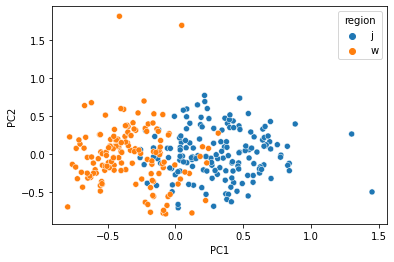

In [28]:
sns.scatterplot(x="PC1", y="PC2", data=PCX, hue="region")

In [29]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCX[['PC1','PC2']])
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0,

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

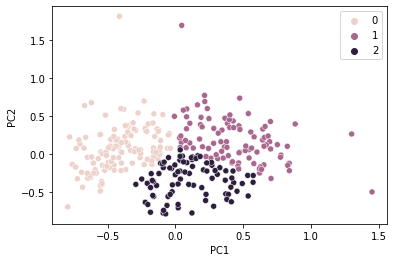

In [30]:
sns.scatterplot(x="PC1", y="PC2", data=PCX, hue=kmeans.labels_)

In [31]:
# cumulative explained variacne ratio and accuracy across first 10 PCs
ex_ratio=[]
accuracy=[]
for i in range (1, 11):
    pca = PCA(n_components=i).fit(data)
    col=[]
    for c in range (1, i+1):
        col.append('PC'+str(c))
    PCX=pd.DataFrame(pca.transform(data),columns=col)
    ex_ratio.append(sum(pca.explained_variance_ratio_))
    PCX['region']=['j']*158+['w']*149
    # the number of clusters is 2???????????
    kmeans = KMeans(n_clusters=2, random_state=0).fit(PCX[col])
    j_tn=158
    w_tn=149
    j_c=0
    w_c=0
    for j in range (len(kmeans.labels_)):
        if kmeans.labels_[j]==0:
            if PCX['region'][j]=='w':
                w_c+=1
        else:
            if PCX['region'][j]=='j':
                j_c+=1
    acc=(j_c/j_tn+w_c/w_tn)/2
    if acc > 0.5:
        accuracy.append(acc)
    else:
        accuracy.append(1-acc)

In [32]:
ex_ratio

[0.2558554865377713,
 0.4294681780933567,
 0.5595582438279213,
 0.6414208020207617,
 0.7087930948290235,
 0.7711218917601038,
 0.8226872147340265,
 0.8594512082948391,
 0.892179121689782,
 0.9188899678873913]

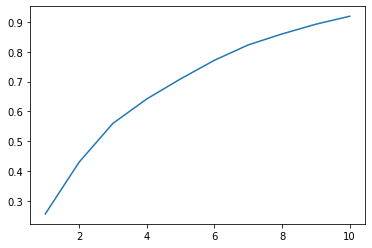

In [33]:
plt.plot(range(1,11), ex_ratio)

In [34]:
accuracy

[0.8932758474216294,
 0.8904935859315266,
 0.8904935859315266,
 0.88713788123354,
 0.88713788123354,
 0.8904935859315266,
 0.8942315861014357,
 0.8942315861014357,
 0.8873290289695013,
 0.8873290289695013]

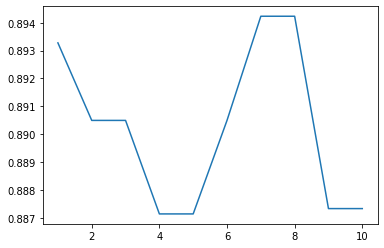

In [35]:
plt.plot(range(1,11),accuracy)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
# Some experiments on supervised learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [38]:
LG=LogisticRegression()
np.mean(cross_val_score(LG, PCX[['PC1', 'PC2']], PCX['region'], cv=10))

0.889247311827957

In [39]:
clf = DecisionTreeClassifier(random_state=0)
np.mean(cross_val_score(clf, PCX[['PC1', 'PC2']], PCX['region'], cv=10))

0.8306451612903226

In [40]:
rf = RandomForestClassifier(random_state=0)
np.mean(cross_val_score(rf, PCX[['PC1']], PCX['region'], cv=10))

0.8178494623655913

In [41]:
from sklearn.model_selection import KFold

In [42]:
# Apply k-fold cross validation on accuracy 2 clusters kmeans clustering for the first 10 PCs
result_kfold=[]
for i in range (1, 11):
    pca = PCA(n_components=i).fit(data)
    col=[]
    for c in range (1, i+1):
        col.append('PC'+str(c))
    PCX=pd.DataFrame(pca.transform(data),columns=col)
    PCX['region']=['j']*158+['w']*149


    kf = KFold(n_splits=10,shuffle=True)
    accuracy=[]
    # split: generate indices to splite data into training and test set
    for train, test in kf.split(PCX):
        train_PCX=PCX.iloc[train,:]
        # only contain PC column
        train_PCX=train_PCX[col]
        train_region=PCX['region'][train]
        test_PCX=PCX.iloc[test,:]
        test_PCX=test_PCX[col]
        test_region=PCX['region'][test].reset_index(drop=True)
        # here considering 2 groups
        kmeans = KMeans(n_clusters=2, random_state=0).fit(train_PCX)
        j_tn=len(test_region[test_region=='j'])
        w_tn=len(test_region[test_region=='w'])
        j_c=0
        w_c=0
        result=kmeans.predict(test_PCX)
        for j in range (len(result)):
            if result[j]==0:
                if test_region[j]=='w':
                    w_c+=1
            else:
                if test_region[j]=='j':
                    j_c+=1
        acc=(j_c/j_tn+w_c/w_tn)/2
        if acc > 0.5:
            accuracy.append(acc)
        else:
            accuracy.append(1-acc)
    result_kfold.append(np.mean(accuracy))

In [43]:
result_kfold

[0.8959841628959276,
 0.8829961971293241,
 0.893601986267722,
 0.8854434192398589,
 0.8793754040077569,
 0.88882828794013,
 0.8865287653522949,
 0.8753156423899459,
 0.8917083574320417,
 0.8907845300124713]

(0.0, 1.0)

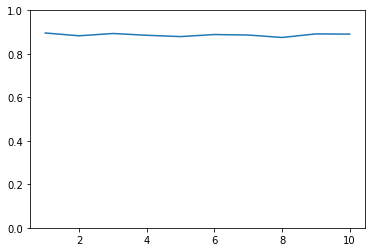

In [44]:
plt.plot(range(1,11),result_kfold)
plt.ylim(0, 1)

In [45]:
#Calculate probability
pca = PCA(n_components=2).fit(data)
PCX=pd.DataFrame(pca.transform(data),columns=['PC1','PC2'])
PCX['region']=['j']*158+['w']*149
PCX

,PC1,PC2,region
0,0.020186,-0.705757,j
1,0.367310,-0.342059,j
2,0.308858,-0.264582,j
3,0.206610,-0.206125,j
4,-0.024590,-0.493480,j
...,...,...,...
302,-0.305319,0.332259,w
303,-0.173996,-0.087432,w
304,-0.493125,0.085394,w
305,-0.292309,-0.396246,w


In [46]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(PCX[['PC1','PC2']])
kmeans.cluster_centers_

array([[-0.3348112 , -0.02879118],
       [ 0.37898768,  0.03259002]])

In [47]:
# the distance between one data point and the cluster center
d1=[]
d2=[]
for i in range(len(PCX)):
    location=list(PCX.iloc[i,:2])
    distance1=np.sqrt(sum((location-kmeans.cluster_centers_[0])**2))
    distance2=np.sqrt(sum((location-kmeans.cluster_centers_[1])**2))
    d1.append(distance1)
    d2.append(distance2)
dictionary={'d1':d1, 'd2':d2}

In [48]:
PC2s_D=pd.DataFrame(data=dictionary)
PC2s_D['region']=['j']*158+['w']*149
PC2s_D

,d1,d2,region
0,0.764399,0.820911,j
1,0.768837,0.374831,j
2,0.685498,0.305335,j
3,0.569723,0.294447,j
4,0.558724,0.663042,j
...,...,...,...
302,0.362253,0.747046,w
303,0.171173,0.565859,w
304,0.195196,0.873710,w
305,0.369904,0.796579,w


In [49]:
LG=LogisticRegression().fit(PC2s_D[['d1','d2']], PC2s_D['region'])

# The dataframe in predict function can be replaced with new instances
probability=LG.predict_proba(PC2s_D[['d1','d2']])
label=LG.predict(PC2s_D[['d1','d2']])
col=[]
labels=['w','j']
prob0=probability[0]
if prob0[0]>prob0[1]:
    col.append(label[0])
    col=col+[x for x in labels if x not in col]
else:
    col.append(label[0])
    col=[x for x in labels if x not in col]+col
prob_df=pd.DataFrame(probability, columns=col)
prob_df['region']=['j']*158+['w']*149
prob_df

,j,w,region
0,0.430149,0.569851,j
1,0.873639,0.126361,j
2,0.880382,0.119618,j
3,0.840307,0.159693,j
4,0.451605,0.548395,j
...,...,...,...
302,0.219430,0.780570,w
303,0.265442,0.734558,w
304,0.079054,0.920946,w
305,0.184291,0.815709,w


In [50]:
prob_df['location'] = "unknown"
j_right1 = 0
j_total1 = 0
w_right1 = 0
w_total1 = 0
for i in range(len(prob_df)):
    if prob_df['region'][i] == 'j':
        j_total1 = j_total1 + 1
    else:
        w_total1 = w_total1 + 1
    if prob_df['j'][i] > 0.5:
        prob_df['location'][i] = 'j'
        if prob_df['location'][i] == prob_df['region'][i]:
            j_right1 = j_right1 + 1
    else:
        prob_df['location'][i] = 'w'
        if prob_df['location'][i] == prob_df['region'][i]:
            w_right1 = w_right1 + 1
j_acc1 = j_right1 / j_total1
w_acc1 = w_right1 / w_total1
print(j_acc1)
print(w_acc1)
print((j_acc1 + w_acc1) / 2)
prob_df

0.8860759493670886
0.912751677852349
0.8994138136097187


/var/folders/9s/m6gh19753kn2ztd4_07fp9d40000gn/T/ipykernel_6594/4083908483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_df['location'][i] = 'w'
/var/folders/9s/m6gh19753kn2ztd4_07fp9d40000gn/T/ipykernel_6594/4083908483.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_df['location'][i] = 'j'


,j,w,region,location
0,0.430149,0.569851,j,w
1,0.873639,0.126361,j,j
2,0.880382,0.119618,j,j
3,0.840307,0.159693,j,j
4,0.451605,0.548395,j,w
...,...,...,...,...
302,0.219430,0.780570,w,w
303,0.265442,0.734558,w,w
304,0.079054,0.920946,w,w
305,0.184291,0.815709,w,w


In [51]:
# Correlation matrix and correlation plot
from mlxtend.plotting import plot_pca_correlation_graph

In [52]:
list(data.columns)

['C14:0',
 'C15:0',
 'C16:0',
 'C16:1n-7',
 'C17:0',
 'C18:0',
 'C18:1n-9',
 'C18:1n-7',
 'C18:2 n-6, LA',
 'C18:3 n-6, GLA',
 'C18:3 n-3, ALA',
 'C20:0',
 'C20:1n-9',
 'C20:2n-6',
 'C20:3 n-6',
 'C20:4n-6, AA',
 'C22:0',
 'C20:5n-3, EPA',
 'C22:4n-6 ',
 'C24:0',
 'C24:1n-9',
 'C22:5n3, DPA',
 'C22:6n3, DHA']

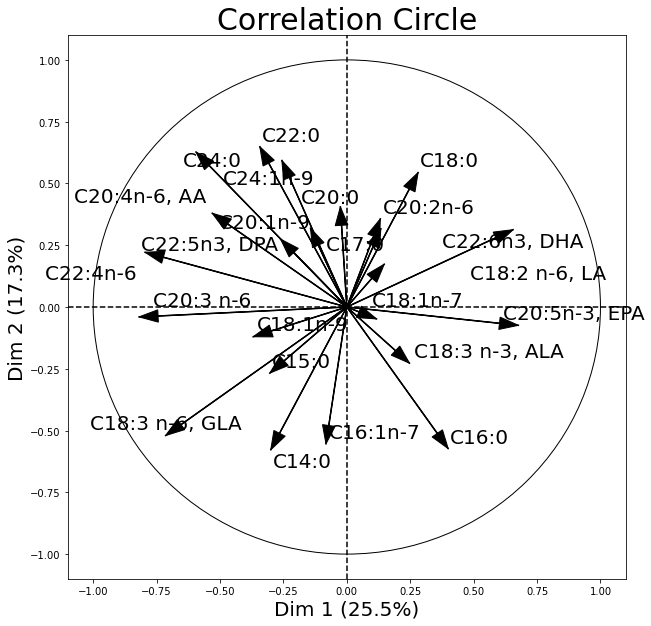

In [53]:
feature_names=list(data.columns)
figure, correlation_matrix = plot_pca_correlation_graph(data, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

In [54]:
correlation_matrix

,Dim 1,Dim 2
C14:0,-0.299827,-0.577834
C15:0,-0.303675,-0.267595
C16:0,0.399577,-0.573042
C16:1n-7,-0.082160,-0.553865
C17:0,0.134224,0.316924
C18:0,0.280998,0.544094
C18:1n-9,-0.369323,-0.120362
C18:1n-7,0.117123,-0.048303
"C18:2 n-6, LA",0.147599,0.173316
"C18:3 n-6, GLA",-0.714442,-0.520232


In [55]:
    # No real usage   
    region=['j']*158+['w']*149
    kf = KFold(n_splits=10,shuffle=True)
    accuracy=[]
    for train, test in kf.split(PCX):
        train_data=data.iloc[train,:]
        train_region=[]
        for i in train:
            train_region.append(region[i])
        test_data=data.iloc[test,:]
        test_region=[]
        for i in test:
            test_region.append(region[i])
        kmeans = KMeans(n_clusters=2, random_state=0).fit(train_data)
        j_tn=len([num for num in test_region if num=='j'])
        w_tn=len([num for num in test_region if num=='w'])
        j_c=0
        w_c=0
        result=kmeans.predict(test_data)
        for j in range (len(result)):
            if result[j]==0:
                if test_region[j]=='w':
                    w_c+=1
            else:
                if test_region[j]=='j':
                    j_c+=1
        acc=(j_c/j_tn+w_c/w_tn)/2
        if acc > 0.5:
            accuracy.append(acc)
        else:
            accuracy.append(1-acc)

In [56]:
np.mean(accuracy)

0.8834923695585462

PC1 to PC1
Cluster 0
With 97.96% are w and 2.04% are j
Cluster 1
With 1.09% are w and 98.91% are j
Cluster 2
With 44.44% are w and 55.56% are j
Until now, the best PCs clustering w is PC1 with accuracy 97.96% and clusering j is PC1 with accuracy 98.91%
0.9843611357586513

PC1 to PC2
Cluster 0
With 91.27% are w and 8.73% are j
Cluster 1
With 4.12% are w and 95.88% are j
Cluster 2
With 35.71% are w and 64.29% are j
Until now, the best PCs clustering w is PC1 with accuracy 97.96% and clusering j is PC1 with accuracy 98.91%
0.9357306496481754

PC1 to PC3
Cluster 0
With 30.77% are w and 69.23% are j
Cluster 1
With 95.76% are w and 4.24% are j
Cluster 2
With 4.71% are w and 95.29% are j
Until now, the best PCs clustering w is PC1 with accuracy 97.96% and clusering j is PC1 with accuracy 98.91%
0.17503259452411996

PC1 to PC4
Cluster 0
With 32.65% are w and 67.35% are j
Cluster 1
With 95.76% are w and 4.24% are j
Cluster 2
With 4.40% are w and 95.60% are j
Until now, the best PCs clustering w

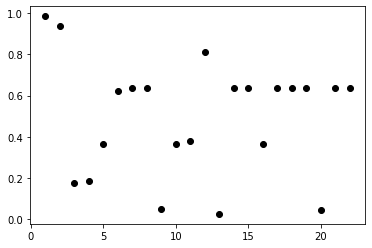

In [57]:
# Analysis on three clusters kmean clustering to choose best PCs
# The object of this analysis is to find the best PCs which is able to produce two completely correct clusters
# Or two clusters with highest accuracy
accuracy=[]
best_w=0
best_j=0
best_PC_w=0
best_PC_j=0
s1 = 0
s2 = 0
for i in range (1, len(list(data.columns))):
    pca = PCA(n_components=i).fit(data)
    col=[]
    for c in range (1, i+1):
        col.append('PC'+str(c))
    PCX=pd.DataFrame(pca.transform(data),columns=col)
    PCX['region']=['j']*158+['w']*149
    kmeans = KMeans(n_clusters=3, random_state=0).fit(PCX[col])
    n_0=0
    n_1=0
    n_2=0
    for j in range (len(kmeans.labels_)):
        if kmeans.labels_[j]==0:
            n_0+=1
        elif kmeans.labels_[j]==1:
            n_1+=1
        else:
            n_2+=1
    print('PC1 to PC{}'.format(i))
    for k in range(3):
        print('Cluster {}'.format(k))
        n_w=0
        n_j=0
        for j in range (len(kmeans.labels_)):
            if kmeans.labels_[j]==k:
                if PCX['region'][j]=='w':
                    n_w+=1
                else:
                    n_j+=1
        if k==0:
            n_k=n_0
            s1 = n_w/n_k
        elif k==1:
            n_k=n_1
            s2 = n_j/n_k
        else:
            n_k=n_2
        print('With {:.2f}% are w and {:.2f}% are j'.format(n_w/n_k*100, n_j/n_k*100))
        if n_w/n_k>best_w:
            best_w=n_w/n_k
            best_PC_w=i
        if n_j/n_k>best_j:
            best_j=n_j/n_k
            best_PC_j=i
    print('Until now, the best PCs clustering w is PC{} with accuracy {:.2f}% and clusering j is PC{} with accuracy {:.2f}%'.format(best_PC_w, best_w*100, best_PC_j, best_j*100))
    print((s1 + s2) / 2)
    plt.plot(i, (s1 + s2) / 2, 'o', color='black')
    print()     


In [58]:
# According to the result, when only PC1 is used, around 98% of instances in cluster 0 are w
# And around 99% of instances in cluster 1 are j
# PC1 is chosen
pca = PCA(n_components=1).fit(data)
col=[]
for c in range (1, 1+1):
    col.append('PC'+str(c))
PCX=pd.DataFrame(pca.transform(data),columns=col)
PCX['region']=['j']*158+['w']*149
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCX[col])
kmeans.labels_
n_0=0
n_1=0
n_2=0
for j in range (len(kmeans.labels_)):
    if kmeans.labels_[j]==0:
        n_0+=1
    elif kmeans.labels_[j]==1:
        n_1+=1
    else:
        n_2+=1
print('PC1 to PC{}'.format(1))
for k in range(3):
    print('Cluster {}'.format(k))
    n_w=0
    n_j=0
    for j in range (len(kmeans.labels_)):
        if kmeans.labels_[j]==k:
            if PCX['region'][j]=='w':
                n_w+=1
            else:
                n_j+=1
    if k==0:
        n_k=n_0
    elif k==1:
        n_k=n_1
    else:
        n_k=n_2
    print('With {:.2f}% are w and {:.2f}% are j'.format(n_w/n_k*100, n_j/n_k*100))


PC1 to PC1
Cluster 0
With 97.96% are w and 2.04% are j
Cluster 1
With 1.09% are w and 98.91% are j
Cluster 2
With 44.44% are w and 55.56% are j


In [59]:
# Index of instances in intermediate cluster
c2=[]
for j in range (len(kmeans.labels_)):
    if kmeans.labels_[j]==2:
        c2.append(j)
print(c2)
PCX.loc[c2,:]

[0, 3, 4, 9, 11, 12, 15, 17, 18, 23, 27, 28, 29, 30, 32, 33, 39, 43, 45, 48, 49, 50, 54, 63, 65, 66, 67, 70, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 96, 98, 99, 104, 113, 114, 115, 117, 118, 121, 125, 127, 128, 134, 139, 143, 145, 146, 147, 149, 150, 152, 153, 155, 156, 158, 159, 160, 164, 166, 168, 169, 170, 176, 177, 179, 180, 184, 186, 188, 190, 194, 198, 200, 204, 206, 208, 210, 214, 226, 227, 235, 236, 237, 246, 247, 249, 251, 253, 255, 256, 259, 261, 263, 265, 266, 267, 269, 279, 287, 288, 295, 296, 297, 298, 303, 306]


,PC1,region
0,0.020186,j
3,0.206610,j
4,-0.024590,j
9,0.043034,j
11,-0.022184,j
...,...,...
296,0.222482,w
297,-0.167217,w
298,-0.126310,w
303,-0.173996,w


PC1 to PC1
Clusters predict 96.88% of w and 98.75% of j

PC1 to PC2
Clusters predict 85.94% of w and 95.78% of j

PC1 to PC3
Clusters predict 91.26% of w and 92.57% of j

PC1 to PC4
Clusters predict 92.02% of w and 95.16% of j

PC1 to PC5
Clusters predict 95.59% of w and 94.31% of j

PC1 to PC6
Clusters predict 95.82% of w and 92.95% of j

PC1 to PC7
Clusters predict 96.08% of w and 93.98% of j

PC1 to PC8
Clusters predict 95.39% of w and 92.71% of j

PC1 to PC9
Clusters predict 93.34% of w and 94.36% of j

PC1 to PC10
Clusters predict 95.49% of w and 94.86% of j

PC1 to PC11
Clusters predict 96.88% of w and 93.99% of j

PC1 to PC12
Clusters predict 97.31% of w and 94.33% of j

PC1 to PC13
Clusters predict 96.85% of w and 96.44% of j

PC1 to PC14
Clusters predict 95.78% of w and 96.82% of j

PC1 to PC15
Clusters predict 91.64% of w and 94.04% of j

PC1 to PC16
Clusters predict 96.21% of w and 93.86% of j

PC1 to PC17
Clusters predict 92.74% of w and 95.17% of j

PC1 to PC18
Clusters pr

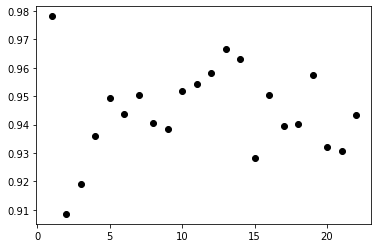

In [60]:
# Apply kfold cross validation on the prvious analysis
pcs={}
for i in range (1, len(list(data.columns))):
    pca = PCA(n_components=i).fit(data)
    col=[]
    for c in range (1, i+1):
        col.append('PC'+str(c))
    print('PC1 to PC{}'.format(i))
    PCX=pd.DataFrame(pca.transform(data),columns=col)
    PCX['region']=['j']*158+['w']*149
    kf = KFold(n_splits=5,shuffle=True)
    n_w_p=np.zeros((3,5))
    n_j_p=np.zeros((3,5))
    k=0
    for train, test in kf.split(PCX):
        train_PCX=PCX.iloc[train,:]
        train_PCX=train_PCX[col]
        train_region=PCX['region'][train]
        test_PCX=PCX.iloc[test,:]
        test_PCX=test_PCX[col]
        test_region=PCX['region'][test].reset_index(drop=True)
        kmeans = KMeans(n_clusters=3, random_state=0).fit(train_PCX)
        prediction=kmeans.predict(test_PCX)
        n_0=sum([a==0 for a in prediction])
        n_1=sum([a==1 for a in prediction])
        n_2=sum([a==2 for a in prediction])

        for j in range(3):
            n_w=0
            n_j=0
            for l in range(len(prediction)):
                if prediction[l]==j:
                    if test_region[l]=='w':
                        n_w+=1
                    else:
                        n_j+=1
            if j==0:
                n_t=n_0
            elif j==1:
                n_t=n_1
            else:
                n_t=n_2
            n_w_p[j][k]=n_w/n_t
            n_j_p[j][k]=n_j/n_t
        k+=1
    w_acc=np.zeros(5)
    j_acc=np.zeros(5)
    for fold in range(5):
        biggest_w=0
        biggest_j=0
        for j in range(3):
            '''print('Cluster {}'.format(j))'''
            '''print('With {:.2f}% are w and {:.2f}% are j'.format(np.mean(n_w_p[j])*100, np.mean(n_j_p[j])*100))'''
            '''print('for w')
            print(n_w_p[j])
            print('for j')
            print(n_j_p[j])'''
            
            if n_w_p[j][fold]>biggest_w:
                biggest_w=n_w_p[j][fold]
            if n_j_p[j][fold]>biggest_j:
                biggest_j=n_j_p[j][fold]
        w_acc[fold]=biggest_w
        j_acc[fold]=biggest_j
    print('Clusters predict {:.2f}% of w and {:.2f}% of j'.format(np.mean(w_acc)*100, np.mean(j_acc)*100))
    plt.plot(i, (np.mean(w_acc) + np.mean(j_acc)) / 2, 'o', color='black')
    print()

In [61]:
# PC1 is still the best
# distance/logistic with 3 groups 1 PC
pca = PCA(n_components=1).fit(data)
col=[]
for c in range (1, 1+1):
    col.append('PC'+str(c))
PCX=pd.DataFrame(pca.transform(data),columns=col)
PCX['region']=['j']*158+['w']*149
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCX[col])
kmeans.labels_


array([2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,

<AxesSubplot:xlabel='PC1'>

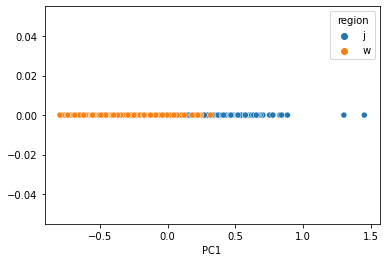

In [62]:
sns.scatterplot(x="PC1", y=0, data=PCX, hue="region")

<AxesSubplot:xlabel='PC1'>

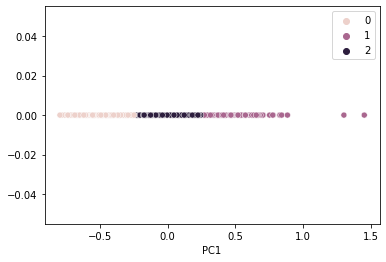

In [63]:
sns.scatterplot(x="PC1", y=0, data=PCX, hue=kmeans.labels_)

In [64]:
c2=[]
for j in range (len(kmeans.labels_)):
    if kmeans.labels_[j]==2:
        c2.append(j)
print(c2)

[0, 3, 4, 9, 11, 12, 15, 17, 18, 23, 27, 28, 29, 30, 32, 33, 39, 43, 45, 48, 49, 50, 54, 63, 65, 66, 67, 70, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 96, 98, 99, 104, 113, 114, 115, 117, 118, 121, 125, 127, 128, 134, 139, 143, 145, 146, 147, 149, 150, 152, 153, 155, 156, 158, 159, 160, 164, 166, 168, 169, 170, 176, 177, 179, 180, 184, 186, 188, 190, 194, 198, 200, 204, 206, 208, 210, 214, 226, 227, 235, 236, 237, 246, 247, 249, 251, 253, 255, 256, 259, 261, 263, 265, 266, 267, 269, 279, 287, 288, 295, 296, 297, 298, 303, 306]


In [65]:
PCX

,PC1,region
0,0.020186,j
1,0.367310,j
2,0.308858,j
3,0.206610,j
4,-0.024590,j
...,...,...
302,-0.305319,w
303,-0.173996,w
304,-0.493125,w
305,-0.292309,w


In [66]:
# Number of ws and js in intermediate cluster when only PC1 is used
number=len(PCX['region'][c2])
j_percentage=sum([a=='j' for a in PCX['region'][c2]])/number
w_percentage=sum([a=='w' for a in PCX['region'][c2]])/number
print(j_percentage)
print(w_percentage)

0.5555555555555556
0.4444444444444444


In [67]:
# Calculate probability for cluster 2 instances
C2s=PCX.iloc[c2,:]
C2s

,PC1,region
0,0.020186,j
3,0.206610,j
4,-0.024590,j
9,0.043034,j
11,-0.022184,j
...,...,...
296,0.222482,w
297,-0.167217,w
298,-0.126310,w
303,-0.173996,w


In [68]:
kmeans.cluster_centers_

array([[-0.48258092],
       [ 0.51901005],
       [-0.00389739]])

In [69]:
d1=[]
d2=[]
for i in range(len(C2s)):
    location=list(C2s.iloc[i,:1])
    distance1=np.sqrt(sum((location-kmeans.cluster_centers_[0])**2))
    distance2=np.sqrt(sum((location-kmeans.cluster_centers_[1])**2))
    d1.append(distance1)
    d2.append(distance2)
dictionary={'d1':d1, 'd2':d2}

In [70]:
PC1s_D=pd.DataFrame(data=dictionary)
PC1s_D['region']=C2s.loc[:,['region']].reset_index(drop=True)
PC1s_D

,d1,d2,region
0,0.502767,0.498824,j
1,0.689191,0.312400,j
2,0.457991,0.543600,j
3,0.525615,0.475976,j
4,0.460397,0.541194,j
...,...,...,...
112,0.705063,0.296528,w
113,0.315364,0.686227,w
114,0.356271,0.645320,w
115,0.308585,0.693006,w


In [71]:
'''
PC1s_D['location'] = "unknown"
j_right = 0
j_total = 0
w_right = 0
w_total = 0
for i in range(len(PC1s_D)):
    if PC1s_D['region'][i] == 'j':
        j_total = j_total + 1
    else:
        w_total = w_total + 1
    if PC1s_D['d1'][i] < PC1s_D['d2'][i]:
        PC1s_D['location'][i] = 'j'
        if PC1s_D['location'][i] == PC1s_D['region'][i]:
            j_right = j_right + 1
    else:
        PC1s_D['location'][i] = 'w'
        if PC1s_D['location'][i] == PC1s_D['region'][i]:
            w_right = w_right + 1
j_acc2 = j_right / j_total
w_acc2 = w_right / w_total
print(j_acc2)
print(w_acc2)
print((j_acc2 + w_acc2) / 2)
'''

'\nPC1s_D[\'location\'] = "unknown"\nj_right = 0\nj_total = 0\nw_right = 0\nw_total = 0\nfor i in range(len(PC1s_D)):\n    if PC1s_D[\'region\'][i] == \'j\':\n        j_total = j_total + 1\n    else:\n        w_total = w_total + 1\n    if PC1s_D[\'d1\'][i] < PC1s_D[\'d2\'][i]:\n        PC1s_D[\'location\'][i] = \'j\'\n        if PC1s_D[\'location\'][i] == PC1s_D[\'region\'][i]:\n            j_right = j_right + 1\n    else:\n        PC1s_D[\'location\'][i] = \'w\'\n        if PC1s_D[\'location\'][i] == PC1s_D[\'region\'][i]:\n            w_right = w_right + 1\nj_acc2 = j_right / j_total\nw_acc2 = w_right / w_total\nprint(j_acc2)\nprint(w_acc2)\nprint((j_acc2 + w_acc2) / 2)\n'

In [72]:
LG=LogisticRegression().fit(PC1s_D[['d1','d2']], PC1s_D['region'])

# The dataframe in predict function can be replaced with new instances
probability=LG.predict_proba(PC1s_D[['d1','d2']])
label=LG.predict(PC1s_D[['d1','d2']])
col=[]
labels=['w','j']
prob0=probability[0]
if prob0[0]>prob0[1]:
    col.append(label[0])
    col=col+[x for x in labels if x not in col]
else:
    col.append(label[0])
    col=[x for x in labels if x not in col]+col
prob_df=pd.DataFrame(probability, columns=col)
prob_df['region']=C2s.loc[:,['region']].reset_index(drop=True)
prob_df

,j,w,region
0,0.581054,0.418946,j
1,0.732526,0.267474,j
2,0.540831,0.459169,j
3,0.601205,0.398795,j
4,0.543011,0.456989,j
...,...,...,...
112,0.743721,0.256279,w
113,0.411724,0.588276,w
114,0.448298,0.551702,w
115,0.405745,0.594255,w


In [73]:
prob_df['location'] = "unknown"
j_right1 = 0
j_total1 = 0
w_right1 = 0
w_total1 = 0
for i in range(len(prob_df)):
    if prob_df['region'][i] == 'j':
        j_total1 = j_total1 + 1
    else:
        w_total1 = w_total1 + 1
    if prob_df['j'][i] > 0.5:
        prob_df['location'][i] = 'j'
        if prob_df['location'][i] == prob_df['region'][i]:
            j_right1 = j_right1 + 1
    else:
        prob_df['location'][i] = 'w'
        if prob_df['location'][i] == prob_df['region'][i]:
            w_right1 = w_right1 + 1
j_acc1 = j_right1 / j_total1
w_acc1 = w_right1 / w_total1
print(j_acc1)
print(w_acc1)
print((j_acc1 + w_acc1) / 2)
prob_df

0.8461538461538461
0.6730769230769231
0.7596153846153846


/var/folders/9s/m6gh19753kn2ztd4_07fp9d40000gn/T/ipykernel_6594/4083908483.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_df['location'][i] = 'j'
/var/folders/9s/m6gh19753kn2ztd4_07fp9d40000gn/T/ipykernel_6594/4083908483.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prob_df['location'][i] = 'w'


,j,w,region,location
0,0.581054,0.418946,j,j
1,0.732526,0.267474,j,j
2,0.540831,0.459169,j,j
3,0.601205,0.398795,j,j
4,0.543011,0.456989,j,j
...,...,...,...,...
112,0.743721,0.256279,w,j
113,0.411724,0.588276,w,w
114,0.448298,0.551702,w,w
115,0.405745,0.594255,w,w


In [74]:
# 2PCs
pca = PCA(n_components=2).fit(data)
col=[]
for c in range (1, 1+2):
    col.append('PC'+str(c))
PCX=pd.DataFrame(pca.transform(data),columns=col)
PCX['region']=['j']*158+['w']*149
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCX[col])
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0,

In [75]:
PCX

,PC1,PC2,region
0,0.020186,-0.705757,j
1,0.367310,-0.342059,j
2,0.308858,-0.264582,j
3,0.206610,-0.206125,j
4,-0.024590,-0.493480,j
...,...,...,...
302,-0.305319,0.332259,w
303,-0.173996,-0.087432,w
304,-0.493125,0.085394,w
305,-0.292309,-0.396246,w


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

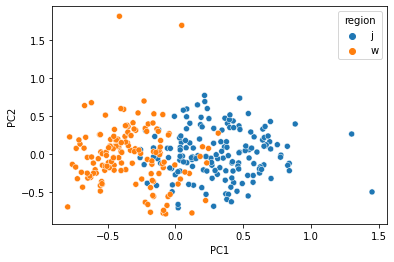

In [76]:
sns.scatterplot(x="PC1", y='PC2', data=PCX, hue='region')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

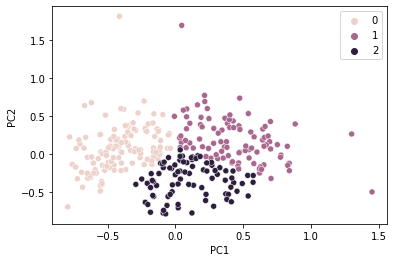

In [77]:
sns.scatterplot(x="PC1", y='PC2', data=PCX, hue=kmeans.labels_)

In [78]:
c2=[]
for j in range (len(kmeans.labels_)):
    if kmeans.labels_[j]==2:
        c2.append(j)
print(c2)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 26, 27, 28, 29, 32, 69, 70, 76, 77, 78, 80, 81, 84, 85, 86, 87, 88, 89, 113, 116, 117, 118, 124, 125, 129, 134, 135, 137, 140, 142, 144, 145, 146, 147, 148, 149, 151, 152, 153, 155, 156, 159, 164, 169, 179, 180, 184, 194, 214, 227, 237, 247, 249, 251, 253, 255, 256, 259, 261, 263, 265, 266, 269, 279, 287, 293, 295, 296, 297, 305, 306]


In [79]:
# Number of ws and js in intermediate cluster when PC1 and PC2 are used
number=len(PCX['region'][c2])
j_percentage=sum([a=='j' for a in PCX['region'][c2]])/number
w_percentage=sum([a=='w' for a in PCX['region'][c2]])/number
print(j_percentage)
print(w_percentage)

0.6428571428571429
0.35714285714285715
